# Credit Card Clustering with R

### About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical) \
**BALANCE** : Balance amount left in their account to make purchases \
**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) \
**PURCHASES** : Amount of purchases made from account \
**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go \
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment \
**CASH_ADVANCE** : Cash in advance given by the user \
**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) \
**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) \
**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) \
**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid \
**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced" \
**PURCHASES_TRX** : Number of purchase transactions made \
**CREDIT_LIMIT** : Limit of Credit Card for user \
**PAYMENTS** : Amount of Payment done by user \
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user \
**PRCFULLPAYMENT** : Percent of full payment paid by user \
**TENURE** : Tenure of credit card service for user

#### Strategy: 

1. Data Preprocessing : After having imported the dataset I will have to check and see if the data requires any kind of scaling and if all the explanatory variables have the right data type. I might assume that the column representing customer id's is not necessary. I will check for missing values and remove these rows or replace them if needed\. 
<br />
<br />
2. Exploratory Data Analysis: I will try and understand the data a bit further and generate the descriptive statistics. After which I will check for outliers and remove them accordingly. I will then check and see if any of the explanatory variables are correlated to each other.
<br />
<br />
3. I will find an optimal number for the number of clusters using the Silhouette Method in combination with the Elbow Method.
<br />
<br />
4. I will use K Means Clustering with the newly generated optimal value for K to generate the clusters.
<br />
<br />
5. The final results will be analysed. 

### 1. Data Preprocessing

In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
library(cluster)
library(caret)
library(reshape2)
library(corrplot)
library(randomForest)
library(lmtest)
library(zoo)
library(factoextra)
library(compareGroups)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: lattice


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Welcome! Want to learn more? See two factoextra-related books at https://

In [2]:
ccards <- read.csv("CC_General.csv")

In [3]:
# Checking to see if the data set loaded correctly
head(ccards, 10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,C10001,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12
2,C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12
3,C10003,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12
4,C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
5,C10005,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12
6,C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12
7,C10007,627.26081,1.000000,7091.01,6402.63,688.38,0.000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.3143,198.0659,1.000000,12
8,C10008,1823.65274,1.000000,436.20,0.00,436.20,0.000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.0651,532.0340,0.000000,12
9,C10009,1014.92647,1.000000,861.49,661.49,200.00,0.000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.2786,311.9634,0.000000,12


In [4]:
str(ccards)

'data.frame':	8950 obs. of  18 variables:
 $ CUST_ID                         : chr  "C10001" "C10002" "C10003" "C10004" ...
 $ BALANCE                         : num  40.9 3202.5 2495.1 1666.7 817.7 ...
 $ BALANCE_FREQUENCY               : num  0.818 0.909 1 0.636 1 ...
 $ PURCHASES                       : num  95.4 0 773.2 1499 16 ...
 $ ONEOFF_PURCHASES                : num  0 0 773 1499 16 ...
 $ INSTALLMENTS_PURCHASES          : num  95.4 0 0 0 0 ...
 $ CASH_ADVANCE                    : num  0 6443 0 206 0 ...
 $ PURCHASES_FREQUENCY             : num  0.1667 0 1 0.0833 0.0833 ...
 $ ONEOFF_PURCHASES_FREQUENCY      : num  0 0 1 0.0833 0.0833 ...
 $ PURCHASES_INSTALLMENTS_FREQUENCY: num  0.0833 0 0 0 0 ...
 $ CASH_ADVANCE_FREQUENCY          : num  0 0.25 0 0.0833 0 ...
 $ CASH_ADVANCE_TRX                : int  0 4 0 1 0 0 0 0 0 0 ...
 $ PURCHASES_TRX                   : int  2 0 12 1 1 8 64 12 5 3 ...
 $ CREDIT_LIMIT                    : num  1000 7000 7500 7500 1200 1800 13500 2300 7

In [27]:
# This will remove the customer ID column which is not necessary for clustering
ccards <- subset(ccards, select = -CUST_ID)

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'CUST_ID' not found


In [6]:
# Check for missing values in the dataset
sum(is.na(ccards))

[1] 314

In [7]:
# Filling the missing values with the mean of each column
ccards <- na.aggregate(ccards, FUN = mean)

In [8]:
# Check for missing values in the dataset
sum(is.na(ccards))

[1] 0

### 2. Exploratory Data Analysis 

In [9]:
attach(ccards)

In [10]:
summary(ccards)

    BALANCE        BALANCE_FREQUENCY   PURCHASES        ONEOFF_PURCHASES 
 Min.   :    0.0   Min.   :0.0000    Min.   :    0.00   Min.   :    0.0  
 1st Qu.:  128.3   1st Qu.:0.8889    1st Qu.:   39.63   1st Qu.:    0.0  
 Median :  873.4   Median :1.0000    Median :  361.28   Median :   38.0  
 Mean   : 1564.5   Mean   :0.8773    Mean   : 1003.20   Mean   :  592.4  
 3rd Qu.: 2054.1   3rd Qu.:1.0000    3rd Qu.: 1110.13   3rd Qu.:  577.4  
 Max.   :19043.1   Max.   :1.0000    Max.   :49039.57   Max.   :40761.2  
 INSTALLMENTS_PURCHASES  CASH_ADVANCE     PURCHASES_FREQUENCY
 Min.   :    0.0        Min.   :    0.0   Min.   :0.00000    
 1st Qu.:    0.0        1st Qu.:    0.0   1st Qu.:0.08333    
 Median :   89.0        Median :    0.0   Median :0.50000    
 Mean   :  411.1        Mean   :  978.9   Mean   :0.49035    
 3rd Qu.:  468.6        3rd Qu.: 1113.8   3rd Qu.:0.91667    
 Max.   :22500.0        Max.   :47137.2   Max.   :1.00000    
 ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMEN

#### Removing Outliers

In [11]:
# Calculate the z-score for each variable
z_score <- as.data.frame(lapply(ccards, scale))
# Identify the indices of outliers
outliers <- as.vector(which(abs(z_score) > 3, arr.ind = TRUE)[, 1])
# Remove the outliers
data_cleaned <- ccards[-outliers, ]


#### Examining Correlations of Explanatory Variables

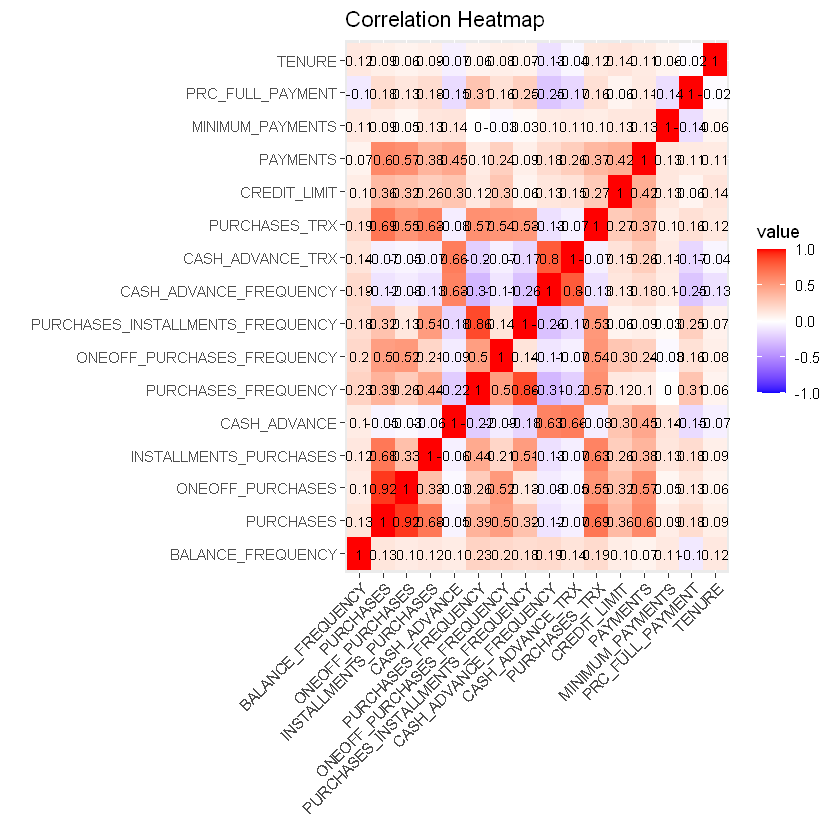

In [12]:
# Subset the explanatory variables
explanatory_vars <- ccards[, 2:ncol(ccards)]

# Calculate the correlation matrix
corr_matrix <- cor(explanatory_vars)

# Convert the correlation matrix to a data frame
corr_df <- melt(corr_matrix)

# Create the heatmap
ggplot(corr_df, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1,1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  geom_text(aes(label = round(value, 2)), size = 3, color = "black")

There are quite a few variables that are strongly correlated with one another such as PURCHASES and ONE_OFF_PURCHASES as well as PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. This is not alarming for now, as K means Clustering is the algorithm which will be used for clustering. I am considering applying Principal Component Analysis because of this but it might not be necessary considering the results of the cluster analysis and if they seem adequate enough. 

### 3. Determining the Number of Clusters

#### Using the Silhouette Method

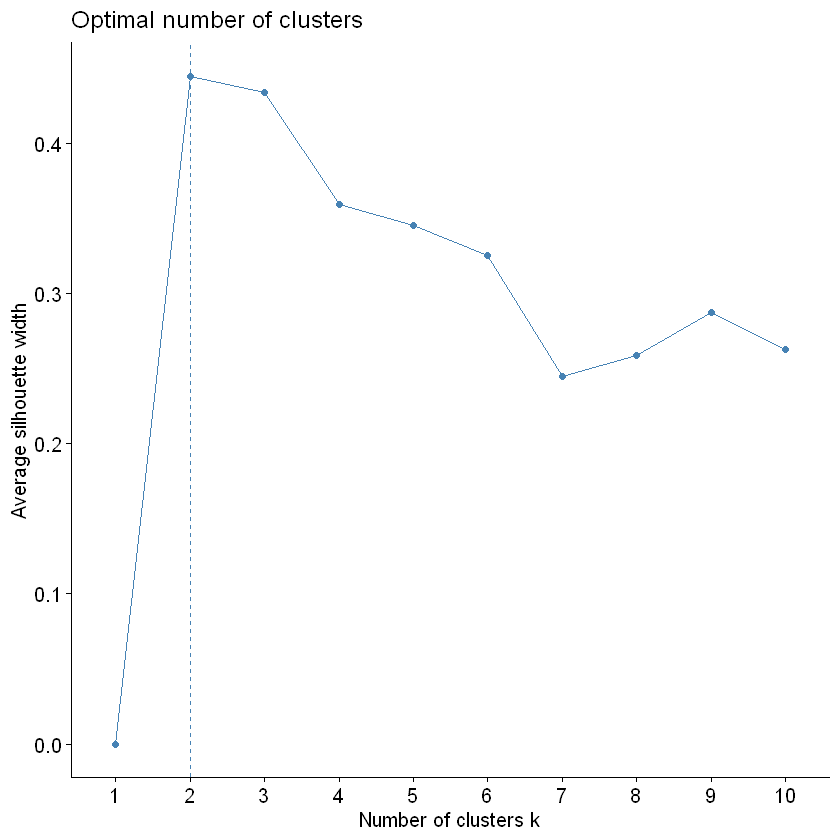

In [13]:
fviz_nbclust(data_cleaned, kmeans, method='silhouette')

#### Using the Elbow Method

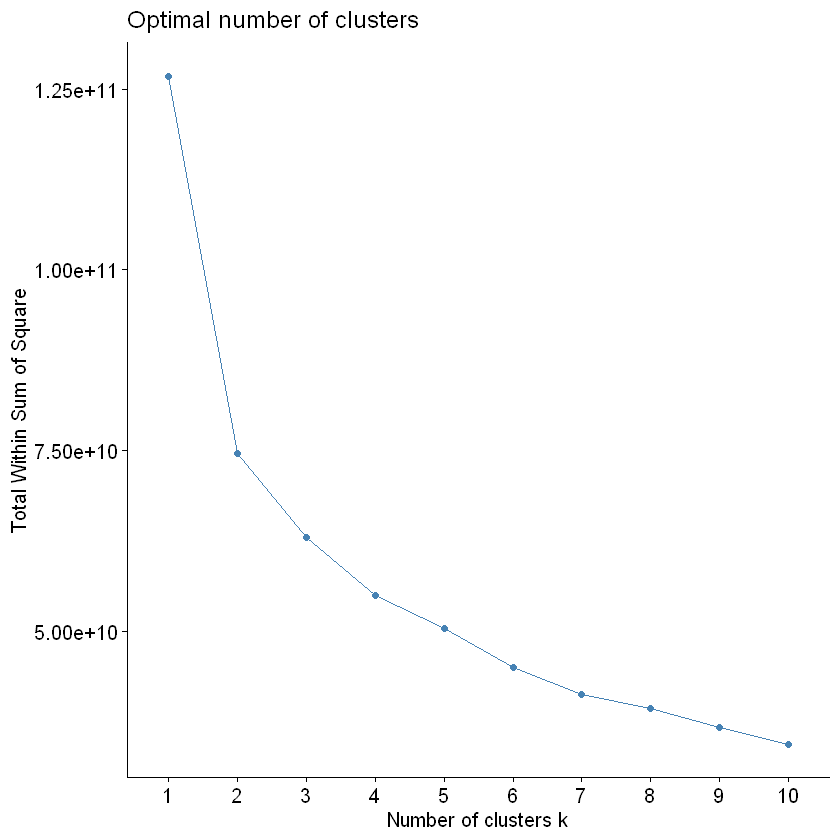

In [26]:
fviz_nbclust(data_cleaned, kmeans, method = "wss")

The results of the silhouette analysis are very determinable whereas it is more difficult to understand the plot generated when using the elbow method. It would seem that two clusters seem to be the optimal number but it might be worth trying a 3 or 4 cluster solution. 

### 4. Final Clustering

In [18]:
km.final <- kmeans(data_cleaned, 2)

## Total Within cluster sum of square
km.final$tot.withinss

## Cluster sizes
km.final$size


data_cleaned$cluster <- km.final$cluster
head(data_cleaned, 6)

[1] 74629888183

[1] 2328 5106

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12,2
2,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12,1
3,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12,1
4,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,864.2065,0.000000,12,1
5,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12,2
6,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12,2


### 5. Analysis

In [19]:
# Create subset of data for cluster 1
cluster1 <- subset(data_cleaned, cluster == 1)

# Create subset of data for cluster 2
cluster2 <- subset(data_cleaned, cluster == 2)

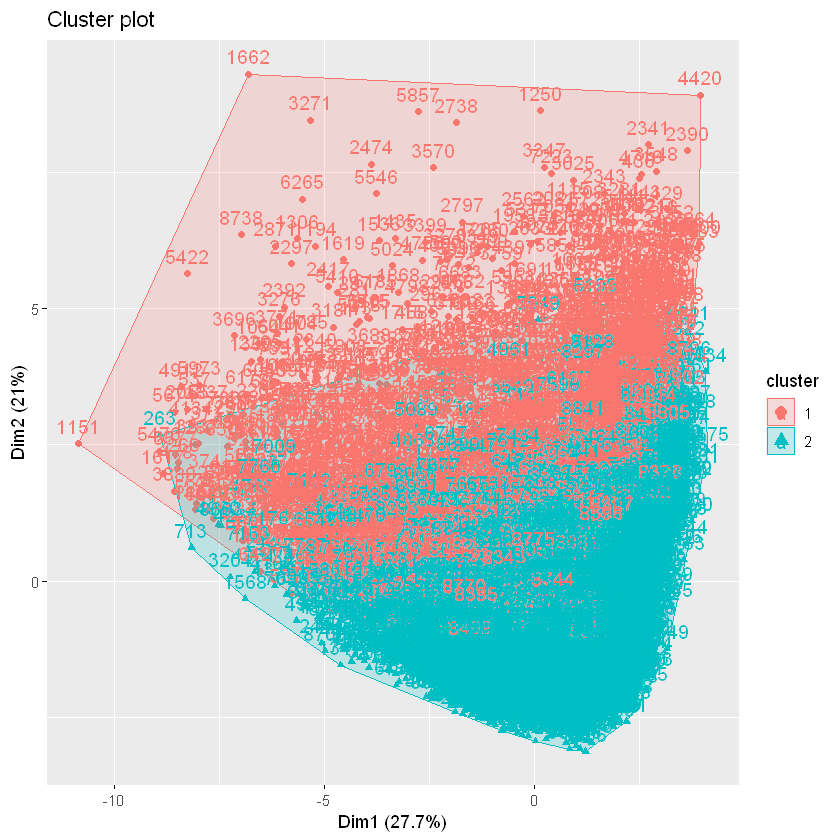

In [20]:
fviz_cluster(km.final, data = data_cleaned)

The clustering generated with the two-cluster solution seem adequate enough. The plots in the first cluster (red above) seem to be more spread out than the points in the second cluster. This solution deserves to be analysed further and I do not believe a three cluster solution would generate better results. 

In [21]:

# Define the variables to compare
vars_to_compare <- setdiff(names(data_cleaned), "cluster")

# Calculate summary statistics for each cluster
summary_table <- data_cleaned %>%
  group_by(cluster) %>%
  summarize(across(all_of(vars_to_compare), list(mean = mean)))

# Combine summary statistics into a single data frame
summary_table <- bind_rows(summary_table, .id = "variable")

# Display the summary table
summary_table

variable,cluster,BALANCE_mean,BALANCE_FREQUENCY_mean,PURCHASES_mean,ONEOFF_PURCHASES_mean,INSTALLMENTS_PURCHASES_mean,CASH_ADVANCE_mean,PURCHASES_FREQUENCY_mean,ONEOFF_PURCHASES_FREQUENCY_mean,PURCHASES_INSTALLMENTS_FREQUENCY_mean,CASH_ADVANCE_FREQUENCY_mean,CASH_ADVANCE_TRX_mean,PURCHASES_TRX_mean,CREDIT_LIMIT_mean,PAYMENTS_mean,MINIMUM_PAYMENTS_mean,PRC_FULL_PAYMENT_mean,TENURE_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2241.7345,0.9213953,1196.8163,766.0233,430.9514,1157.526,0.5425487,0.3034786,0.3702646,0.13602377,3.054983,16.48325,7643.102,2044.9374,801.0417,0.1610406,11.86125
1,2,826.7081,0.8751705,550.8284,278.6528,272.4888,450.570,0.4598474,0.1416738,0.3516731,0.09766528,1.976890,10.04015,2338.399,956.8133,490.9992,0.1516196,11.70035


In observing the mean values of the variables per cluster above, it is not difficult to determine that there are major differences in the clusters generated. It could take some time to understand the distinctiveness of each cluster but there is certainly enough here to get started. 
<br />
<br />
Generally, it would seem that credit card holders in cluster 1 tend to spend more money more frequently. This group could be considered as the Big Spenders group. Their Credit Limits are substantially higher than that of the Credit limits of the other group. The amount of PURCHASES made from the accounts in Cluster 1 are also substantially higher.
<br />
<br />
Interestingly enough, the difference in frequency of ONEOFF_PURCHASES is higher than the difference when viewing standard PURCHASES meaning the BIG SPENDER Group appropriately earn their name as they will more frequently and spontaneously make purchases. This leads one to believe that perhaps these accounts are the accounts of high earners, but that may not be explored any further as this data is non-existent in the dataset.  

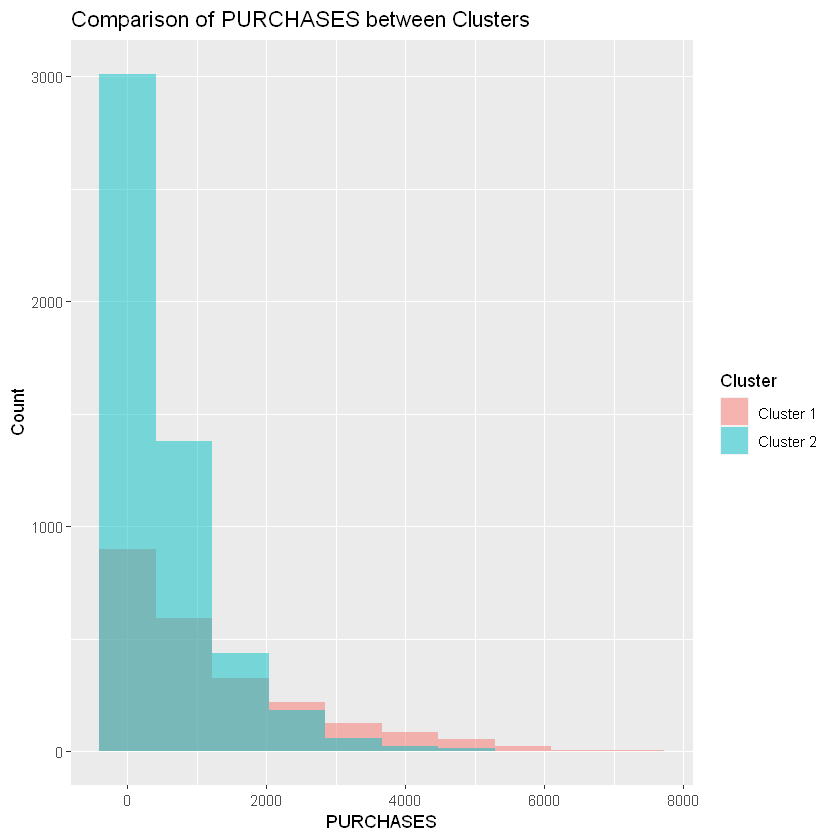

In [28]:
# Combine data for both clusters
cluster_combined <- rbind(cluster1, cluster2)

# Create histogram of PURCHASES for each cluster, colored by cluster
hist_combined <- ggplot(cluster_combined, aes(x = PURCHASES, fill = factor(cluster))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 10) +
  labs(title = "Comparison of PURCHASES between Clusters", x = "PURCHASES", y = "Count") +
  scale_fill_discrete(name = "Cluster", labels = c("Cluster 1", "Cluster 2"))

# Display histogram
hist_combined

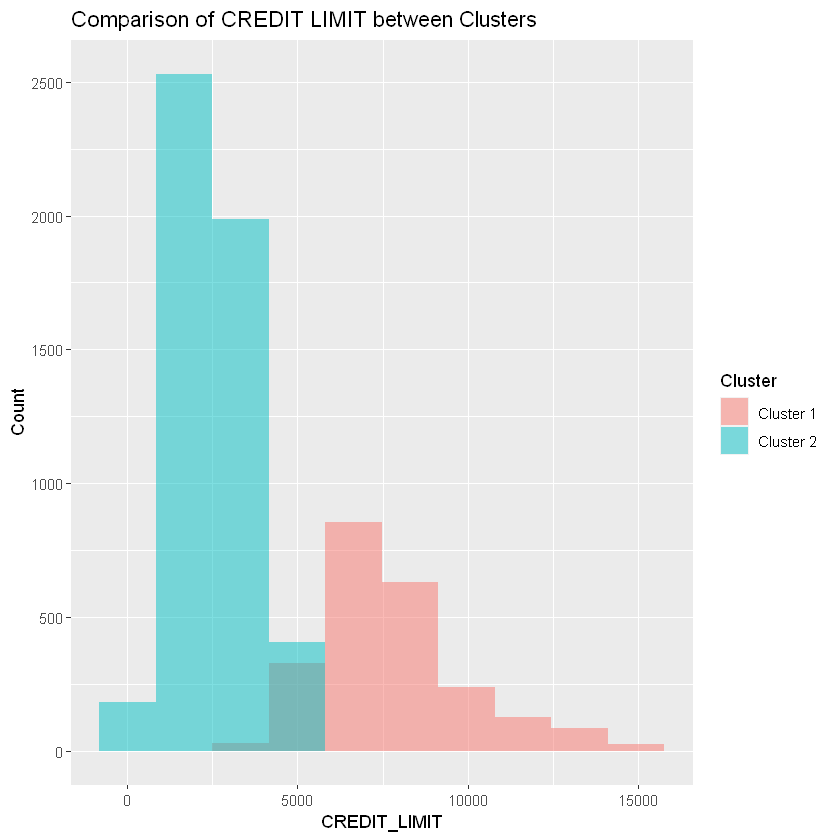

In [23]:
# Combine data for both clusters
cluster_combined <- rbind(cluster1, cluster2)

# Create histogram of PURCHASES for each cluster, colored by cluster
hist_combined <- ggplot(cluster_combined, aes(x = CREDIT_LIMIT, fill = factor(cluster))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 10) +
  labs(title = "Comparison of CREDIT LIMIT between Clusters", x = "CREDIT_LIMIT", y = "Count") +
  scale_fill_discrete(name = "Cluster", labels = c("Cluster 1", "Cluster 2"))

# Display histogram
hist_combined